In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns


In [2]:
train = torch.load("X_train.p")
test = torch.load("X_test.p")


In [3]:
print(train.shape, train.dtype)
print(test.shape, test.dtype)


torch.Size([3135, 41, 10]) torch.float32
torch.Size([3135, 6, 10]) torch.float32


In [18]:
def whiten(A, pipeline=None):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import RobustScaler
    from sklearn.pipeline import Pipeline

    if not pipeline:
        pipeline = Pipeline(
            [
                ("scale", RobustScaler()),
                ("pca", PCA(n_components=A.size(1))),
            ]
        ).fit(A)
    return torch.tensor(pipeline.transform(A)), pipeline


In [15]:
def pp(A):
    A = A.reshape(-1, A.size(-1))
    print("ok")
    A = A[torch.randint(0, A.size(0), (100,)), :]
    
    print(A.shape)
    sns.pairplot(pd.DataFrame(A), diag_kind='kde')


In [19]:
train = train.reshape(-1, train.size(-1))
test = test.reshape(-1, train.size(-1))
train[:, 1:], pipeline = whiten(train[:, 1:])
test[:, 1:], pipeline = whiten(test[:, 1:])

ok
torch.Size([100, 10])


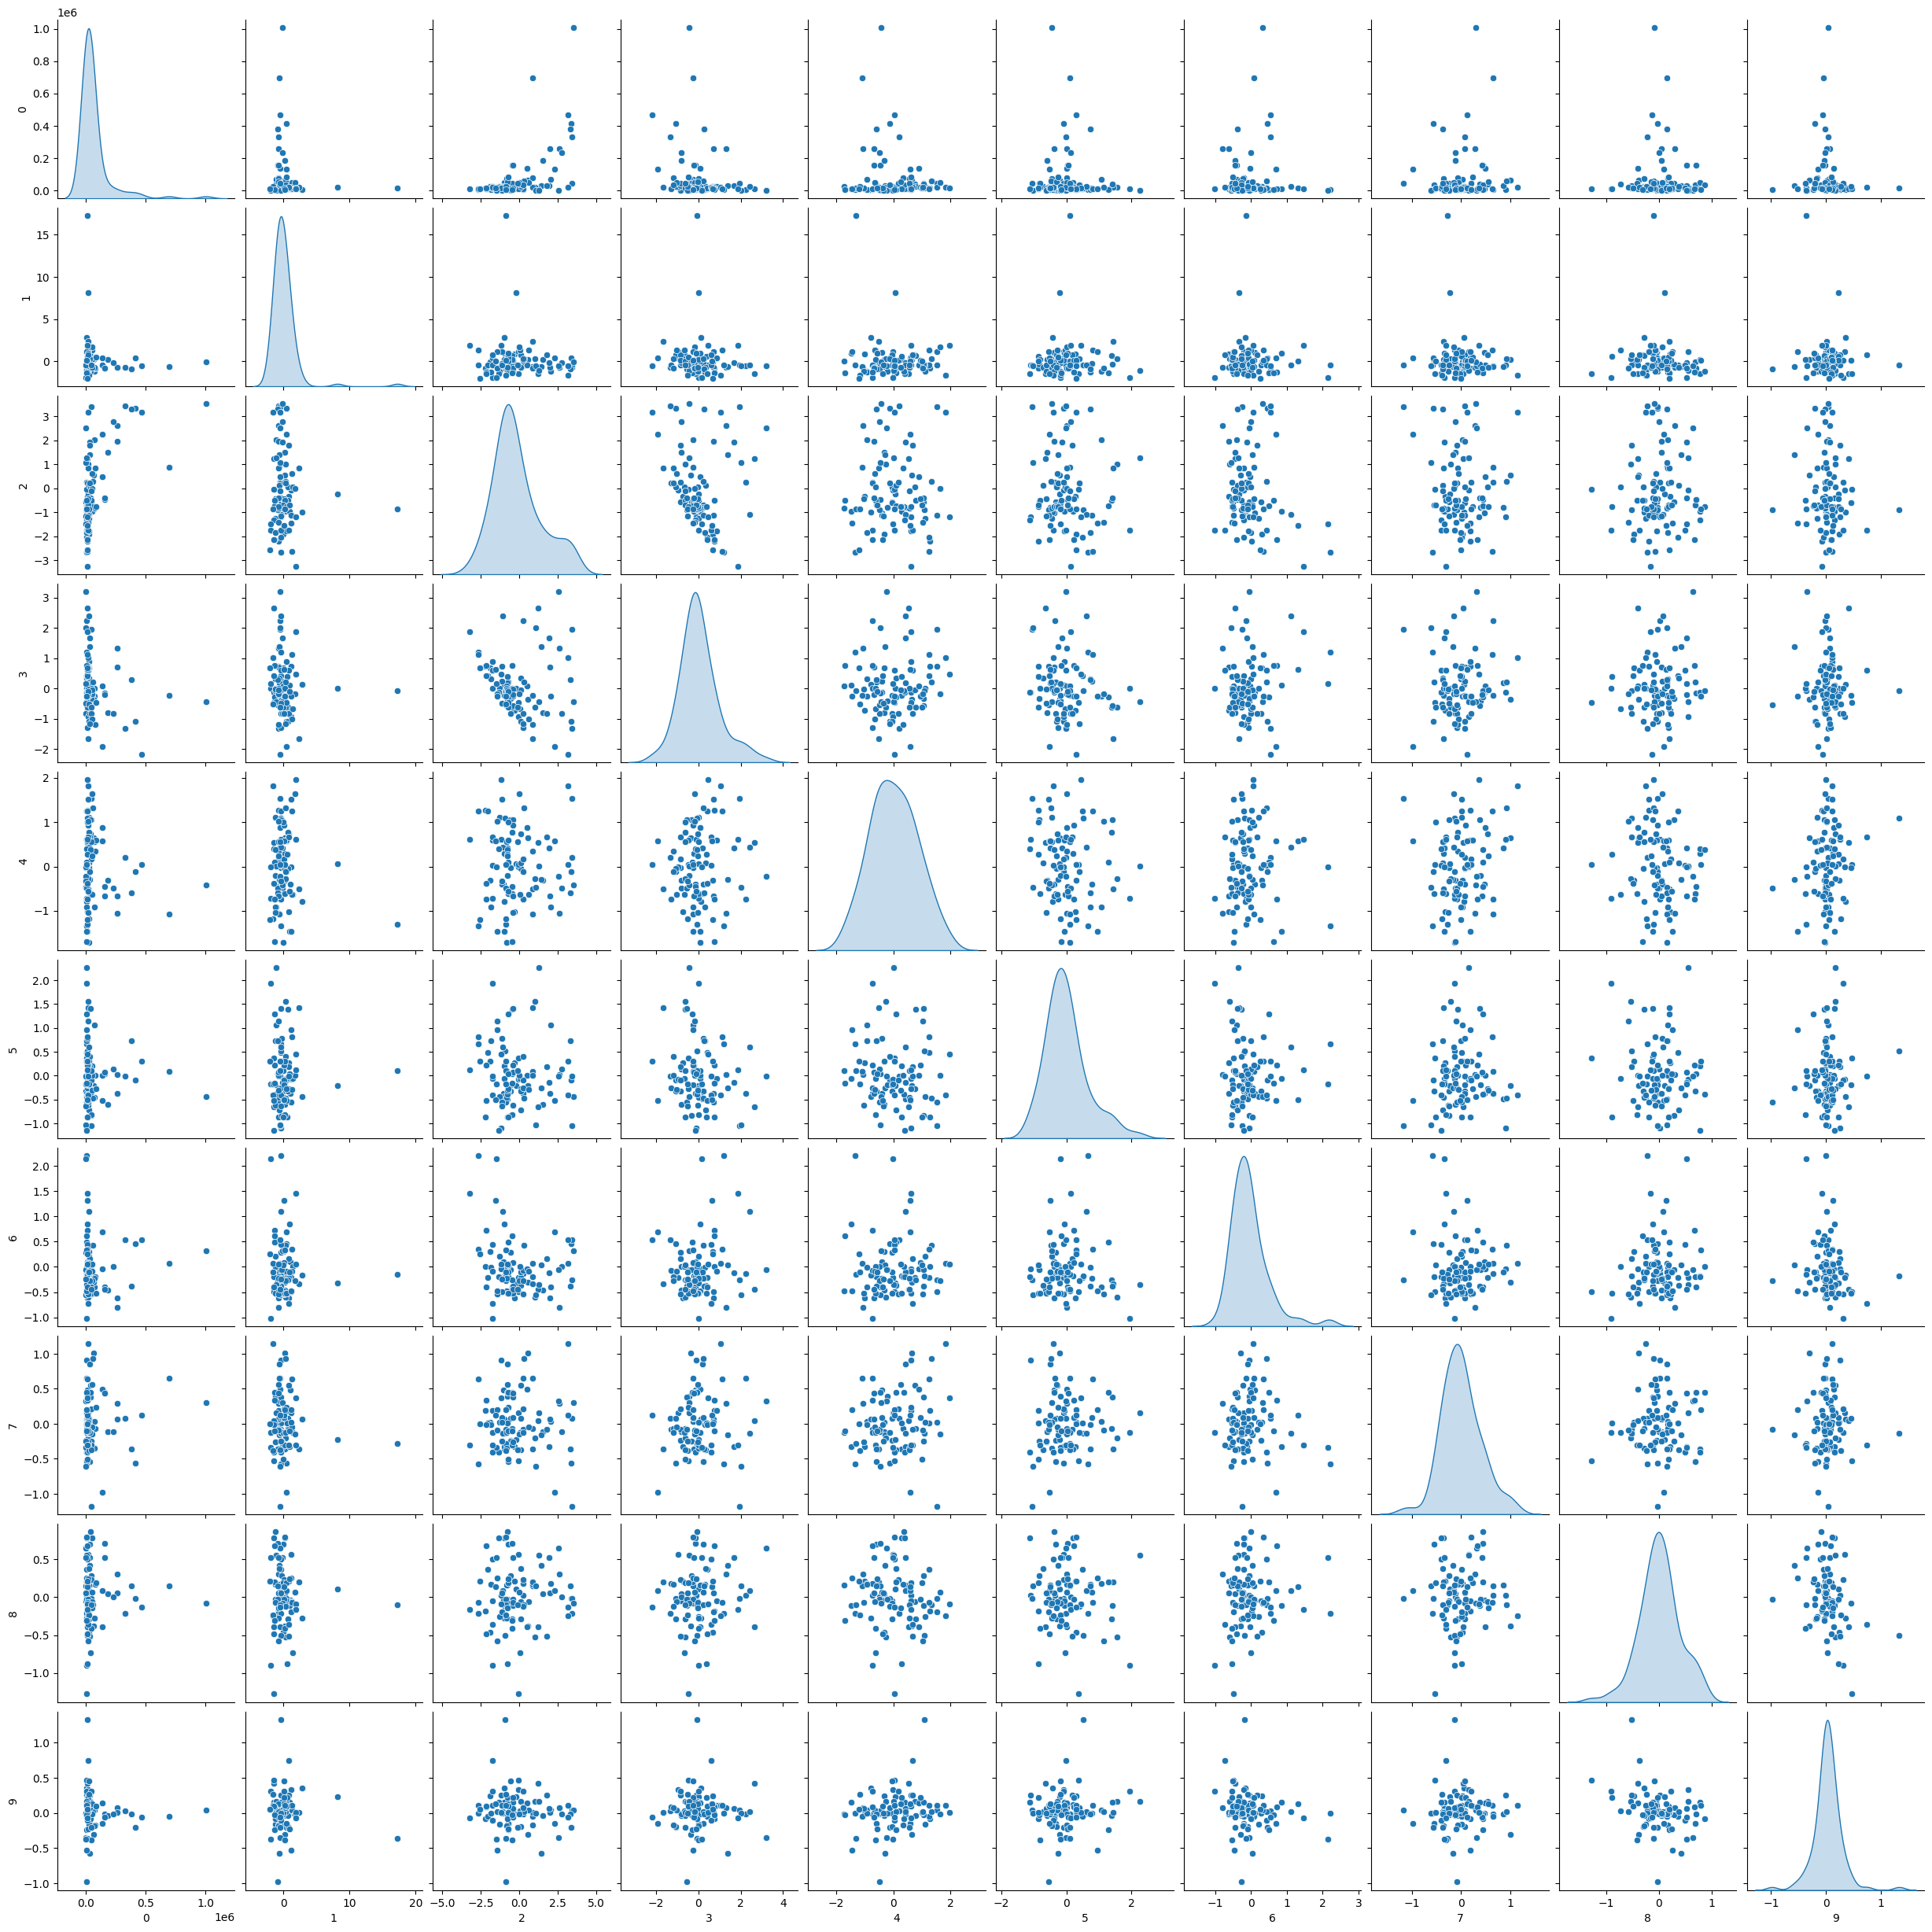

In [20]:
pp(test)